In [17]:
using FileIO
using Plots
using Dates
using LaTeXStrings
using DoubleFloats

In [2]:
mNow() = string(Dates.format(now(), "yyyy-mm-dd_HH:MM:SS"));

In [3]:
ErrorData=load("computations_results_run/Error_Values_Iter11_2024-03-28_18:13:02.jld2")

Dict{String, Any} with 2 entries:
  "Errors"  => DoubleFloat[7.920242790356381 7.028458069508118 … 6.204842736396…
  "maxVarH" => DoubleFloat[0.8052060256868147, 0.7502403355985711, 0.5519260685…

In [4]:
maxDataSize=11
startExp = 1;
DataSizes = (2).^(startExp:maxDataSize)

11-element Vector{Int64}:
    2
    4
    8
   16
   32
   64
  128
  256
  512
 1024
 2048

In [5]:
Errors=ErrorData["Errors"][startExp:maxDataSize,:]
maxVarH=ErrorData["maxVarH"][startExp:maxDataSize];

In [6]:
Errors

11×6 Matrix{DoubleFloat}:
  7.920242790356381        7.028458069508118      …   22.719808600188635
 12.02064983445718        16.081844023438496         211.6186722367746
 15.64458615357358        36.83423563170559           84.60790364012848
  5.932426222371813       10.08892905698149           26.839669583587003
  1.0990548748569227       2.7570103252705294          6.3645799083976335
  0.014328711525819816     0.02336392678090094    …    0.0380333355880442
  2.8338264836783782e-5    8.427720269001003e-5        0.00019659258304906562
  3.6112111412741217e-9    8.343472294751971e-9        1.5494607746092072e-8
  1.7132152617156316e-11   4.108848342175353e-11       8.2324064210274e-11
  1.926563557343481e-11    3.324667713871465e-11       5.032007457803777e-11
  7.002747658365779e-12    7.847967427651377e-12  …    4.91592190697422e-11

In [7]:
plot_size=(450,300);
YTicks = (10.0).^(-12:3);

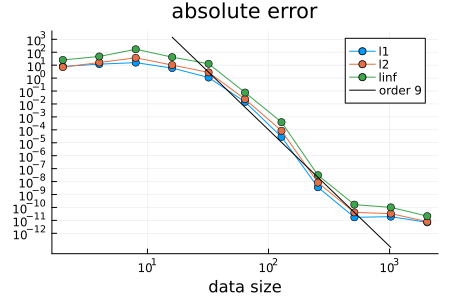

In [8]:
pAbsErr=plot(DataSizes,Errors[:,1:3], xaxis=:log, yaxis=:log, xlabel="data size",label=["l1" "l2" "linf"],title="absolute error",marker=:circle, yticks=YTicks,size=plot_size)
plot!(DataSizes[4:end-1],1e14*DataSizes[4:end-1].^(-9), color=:black, label="order 9")

In [9]:
#savefig(pAbsErr,"plots/AbsErr_"*mNow()*".pdf")

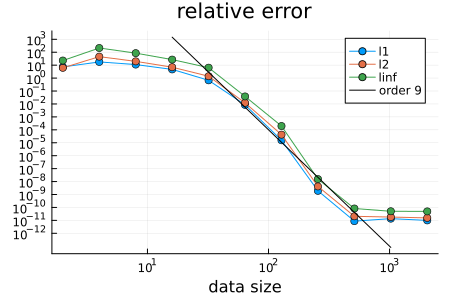

In [10]:
pRelErr=plot(DataSizes,Errors[:,4:6], xaxis=:log, yaxis=:log, xlabel="data size",label=["l1" "l2" "linf"],title="relative error",marker=:circle,yticks=YTicks,size=plot_size)
plot!(DataSizes[4:end-1],1e14*DataSizes[4:end-1].^(-9), color=:black, label="order 9")

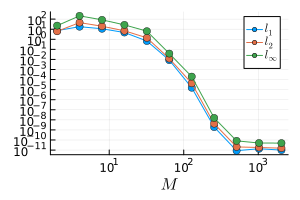

In [31]:
pRelErr=plot(DataSizes,Errors[:,4:6], xaxis=:log, yaxis=:log, xlabel=L"M",label=[L"l_1" L"l_2" L"l_\infty"],marker=:circle,yticks=YTicks,size=plot_size)
plot!(size=(300,200))
#savefig("Acc_rel_error_convergence.pdf")
#plot!(DataSizes[4:end-1],1e14*DataSizes[4:end-1].^(-9), color=:black, label="order 9")

In [11]:
#savefig(pRelErr,"plots/RelErr_"*mNow()*".pdf")

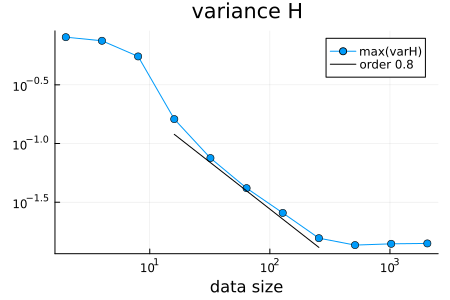

In [12]:
pMaxVarH=plot(DataSizes,maxVarH, xaxis=:log, yaxis=:log, xlabel="data size",label="max(varH)",title="variance H",marker=:circle,size=plot_size)
plot!(DataSizes[4:end-3],1.1*DataSizes[4:end-3].^(-0.8), color=:black, label="order 0.8")

In [13]:
#savefig(pMaxVarH,"plots/MaxVarH_"*mNow()*".pdf")